# Pymaceuticals Inc.
---

### Analysis

- Ramicane & Capomulin have the lowest rates of tumors forming in the mice. More female mice had lower metatastic rates compared to the males. It also appeared across genders that the heavier the mouse was the larger their tumors were that formed. They also both had (Ramicane & Capomulin) the lowest rates of variance among the mice with the tumors. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merge_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
num_mice = merge_data['Mouse ID'].nunique()
print(f"The number of mice in the study is: {num_mice}")

The number of mice in the study is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
duplicate_mice = merge_data[merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
duplicate_mice_mask = merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
merge_data = merge_data[duplicate_mice_mask]
print(duplicate_mice_mask)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
cleaned_data = merge_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print(cleaned_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
cleaned_data = merge_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"The number of mice in this clean DataFrame is: {num_mice_cleaned}")

The number of mice in this clean DataFrame is: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = merge_data.groupby('Drug Regimen')
summary_stats_df = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance',
    'std' : 'Standard Deviation',
    'sem' : 'SEM'
})

# Assemble the resulting series into a single summary DataFrame.
print(summary_stats_df)

              Mean Tumor Volume  Median Tumor Volume   Variance  \
Drug Regimen                                                      
Capomulin             40.675741            41.557809  24.947764   
Ceftamin              52.591172            51.776157  39.290177   
Infubinol             52.884795            51.820584  43.128684   
Ketapril              55.235638            53.698743  68.553577   
Naftisol              54.331565            52.509285  66.173479   
Placebo               54.033581            52.288934  61.168083   
Propriva              52.322552            50.854632  42.351070   
Ramicane              40.216745            40.673236  23.486704   
Stelasyn              54.233149            52.431737  59.450562   
Zoniferol             53.236507            51.818479  48.533355   

              Standard Deviation       SEM  
Drug Regimen                                
Capomulin               4.994774  0.329346  
Ceftamin                6.268188  0.469821  
Infubinol      

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_df = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    [('Mean Tumor Volume', 'mean'),
     ('Median Tumor Volume', 'median'),
     ('Variance', 'var'),
     ('Standard Deviation', 'std'),
     ('SEM', 'sem')]
)

# Using the aggregation method, produce the same summary statistics in a single line
print(summary_stats_df)

              Mean Tumor Volume  Median Tumor Volume   Variance  \
Drug Regimen                                                      
Capomulin             40.675741            41.557809  24.947764   
Ceftamin              52.591172            51.776157  39.290177   
Infubinol             52.884795            51.820584  43.128684   
Ketapril              55.235638            53.698743  68.553577   
Naftisol              54.331565            52.509285  66.173479   
Placebo               54.033581            52.288934  61.168083   
Propriva              52.322552            50.854632  42.351070   
Ramicane              40.216745            40.673236  23.486704   
Stelasyn              54.233149            52.431737  59.450562   
Zoniferol             53.236507            51.818479  48.533355   

              Standard Deviation       SEM  
Drug Regimen                                
Capomulin               4.994774  0.329346  
Ceftamin                6.268188  0.469821  
Infubinol      

## Bar and Pie Charts

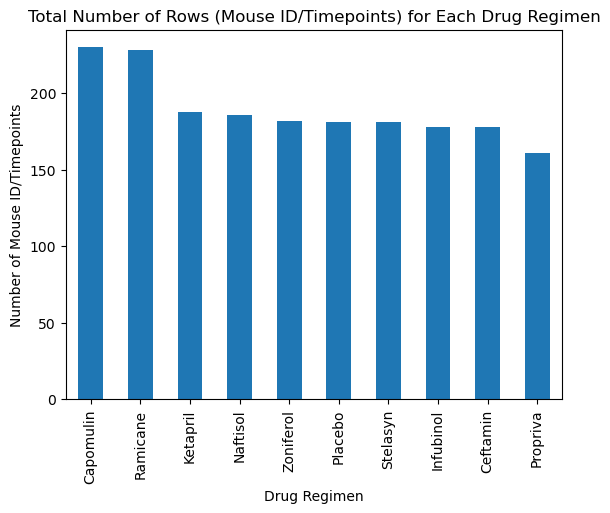

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_by_regimen = merge_data['Drug Regimen'].value_counts()
counts_by_regimen.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.show()

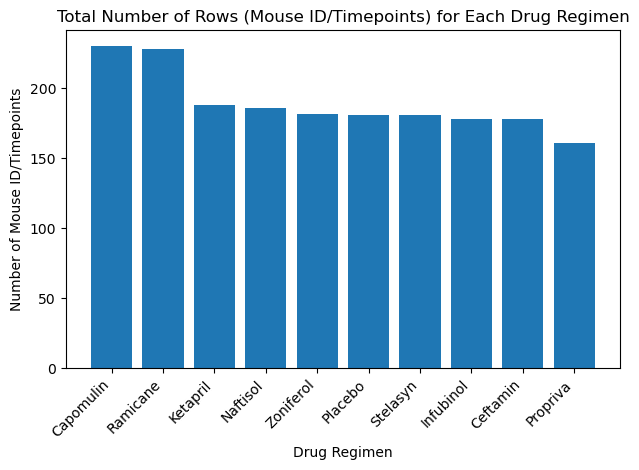

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts_by_regimen.index, counts_by_regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

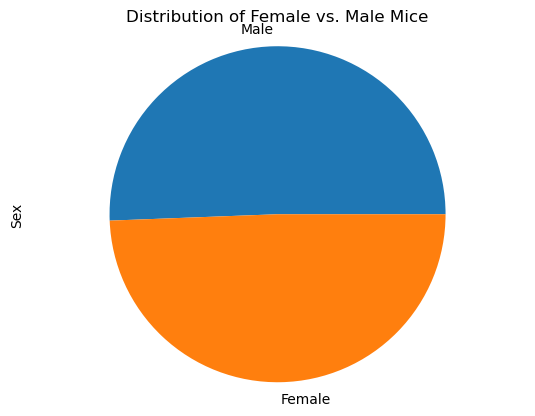

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merge_data['Sex'].value_counts()
gender_counts.plot(kind='pie')
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()

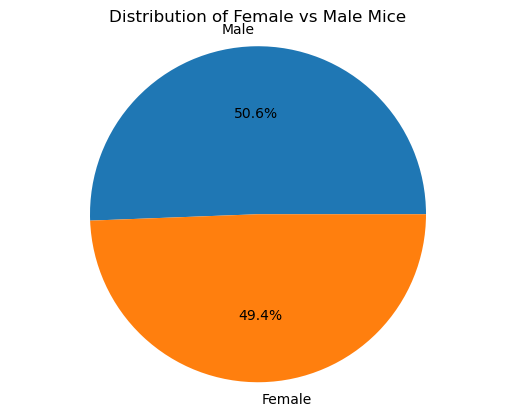

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoints = merge_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume_df = pd.merge(merge_data, last_timepoints, on=['Mouse ID', 'Timepoint'])
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vollume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)','Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)  Tumor Volume (mm3)
0       k403     Ramicane           22.050126           22.050126
1       s185    Capomulin           23.343598           23.343598
2       x401    Capomulin           28.484033           28.484033
3       m601    Capomulin           28.430964           28.430964
4       g791     Ramicane           29.128472           29.128472
..       ...          ...                 ...                 ...
244     z314     Stelasyn           45.934712           45.934712
245     z435     Propriva           48.710661           48.710661
246     z581    Infubinol           62.754451           62.754451
247     z795     Naftisol           65.741070           65.741070
248     z969     Naftisol           73.867845           73.867845

[249 rows x 4 columns]


In [14]:
# Create an empty dictionary to store tumor volume data for each treatment
tumor_volume_data = {}

# For loop to calculate the IQR and determine potential outliers for each treatment
for selected_regimens in selected_regimens:
    # Subset the data for the current treatment
    regimen_data = merge_data[merge_data['Drug Regimen'] == selected_regimens]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Find potential outliers for the current treatment
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Add the tumor volume data and potential outliers to the dictionary
    tumor_volume_data[selected_regimens] = {'Tumor Volumes': tumor_volumes, 'Outliers': outliers}

# Display the tumor volume data and potential outliers for each treatment
for selected_regimens, data in tumor_volume_data.items():
    print(f"Treatment: {selected_regimens}")
    print("Tumor Volumes:")
    print(data['Tumor Volumes'])
    print("Potential Outliers:")
    print(data['Outliers'])
    print("--------")



Treatment: Capomulin
Tumor Volumes:
10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64
Potential Outliers:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
--------
Treatment: Ramicane
Tumor Volumes:
0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64
Potential Outliers:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
--------
Treatment: Infubinol
Tumor Volumes:
454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Vol

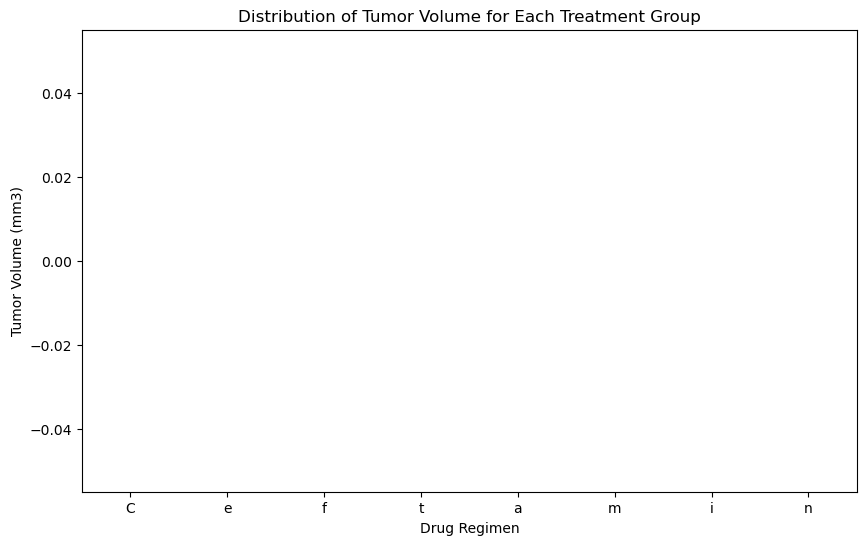

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = []
# Extract the tumor volume data for each treatment and add it to the list
for regimen_data in selected_regimens:
    regimen_data = merge_data[merge_data['Drug Regimen'] == regimen_data]
    tumor_volume_data.append(regimen_data['Tumor Volume (mm3)'])

# Create the box plot using pyplot
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data, labels=selected_regimens, notch=True, patch_artist=True)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

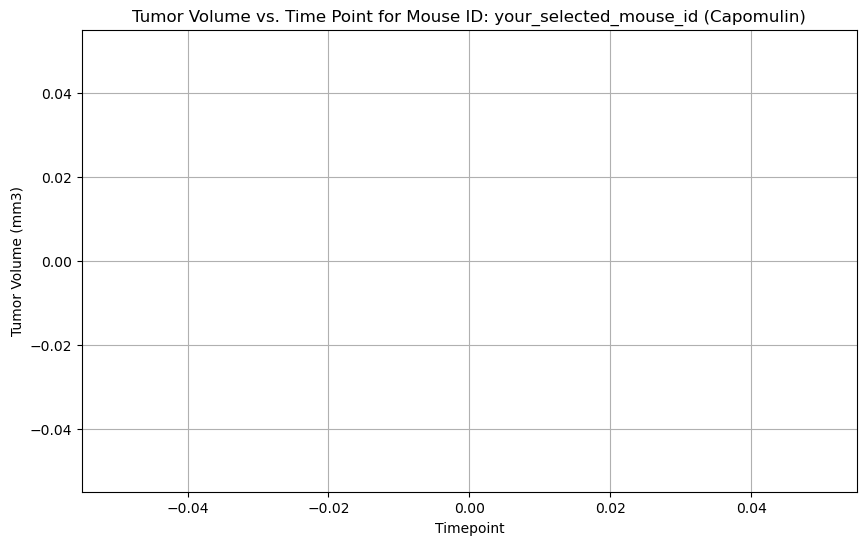

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'your_selected_mouse_id'
selected_mouse_data = merge_data[(merge_data['Drug Regimen'] == 'Capomulin') & (merge_data['Mouse ID'] == selected_mouse_id)]

# Create the line plot using pyplot
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='skyblue')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {selected_mouse_id} (Capomulin)')

# Show the plot
plt.grid()
plt.show()


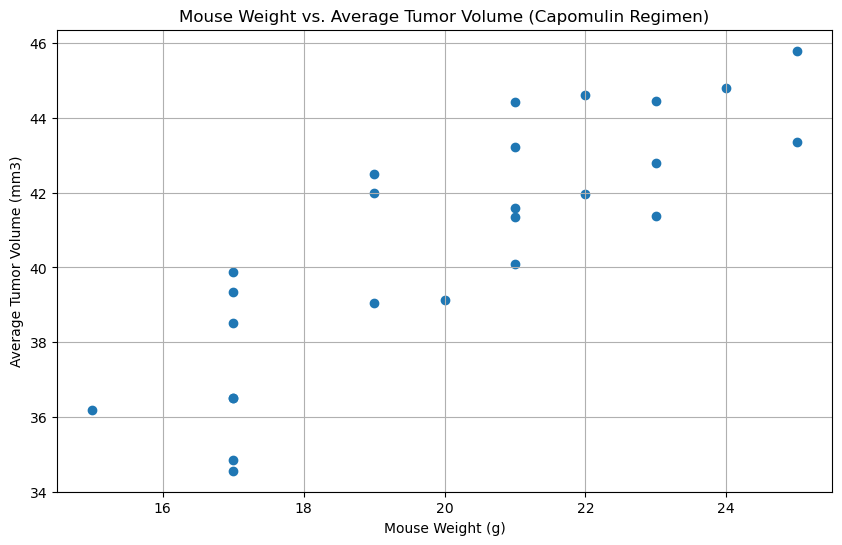

In [43]:
capomulin_data = merge_data[merge_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Create a DataFrame containing Mouse ID, Weight, and the corresponding Average Tumor Volume
average_tumor_volume_df = pd.merge(mouse_metadata[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID')

# Create the scatter plot using pyplot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.grid()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


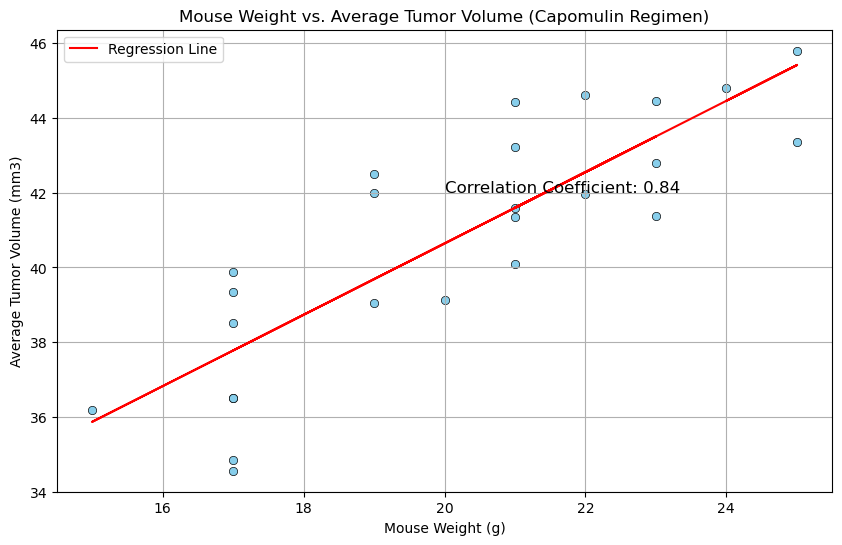

In [44]:
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress


average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Create a DataFrame containing Mouse ID, Weight, and the corresponding Average Tumor Volume
average_tumor_volume_df = pd.merge(mouse_metadata[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = pearsonr(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression to get the slope, intercept, and r-value
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Tumor Volume (mm3)'])

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=average_tumor_volume_df, color='skyblue', edgecolor='black')

# Plot the regression line
x_values = average_tumor_volume_df['Weight (g)']
plt.plot(x_values, slope * x_values + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add the correlation coefficient to the plot
plt.text(20, 42, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12)

# Show the plot
plt.grid()
plt.legend()
plt.show()
